In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('orthopadic_3c.csv')
df1=pd.read_csv('orthopadic_2CC.csv')

In [3]:
df['class_2c']=df1['class_2c']
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_3c,class_2c
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia,Abnormal
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,Normal


# Data Preprocessing



### 1.Data cleaning

#### 1.1 handling missing values 

In [4]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class_3c                    0
class_2c                    0
dtype: int64

#### 1.2 Remove outliers

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class_3c', ylabel='count'>

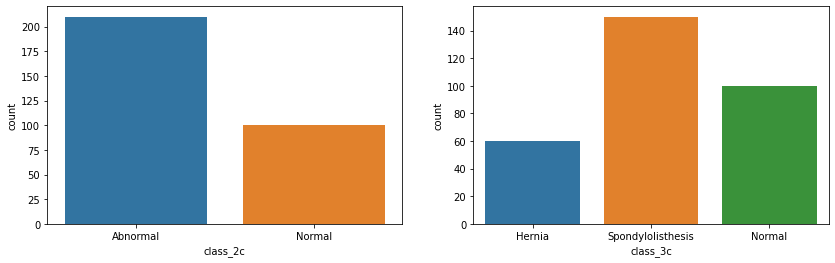

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
sns.countplot(df['class_2c'],ax=ax[0])
sns.countplot(df['class_3c'],ax=ax[1])

In [6]:
#data set is already balanced ,we can remove the outliers

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='degree_spondylolisthesis', ylabel='Density'>

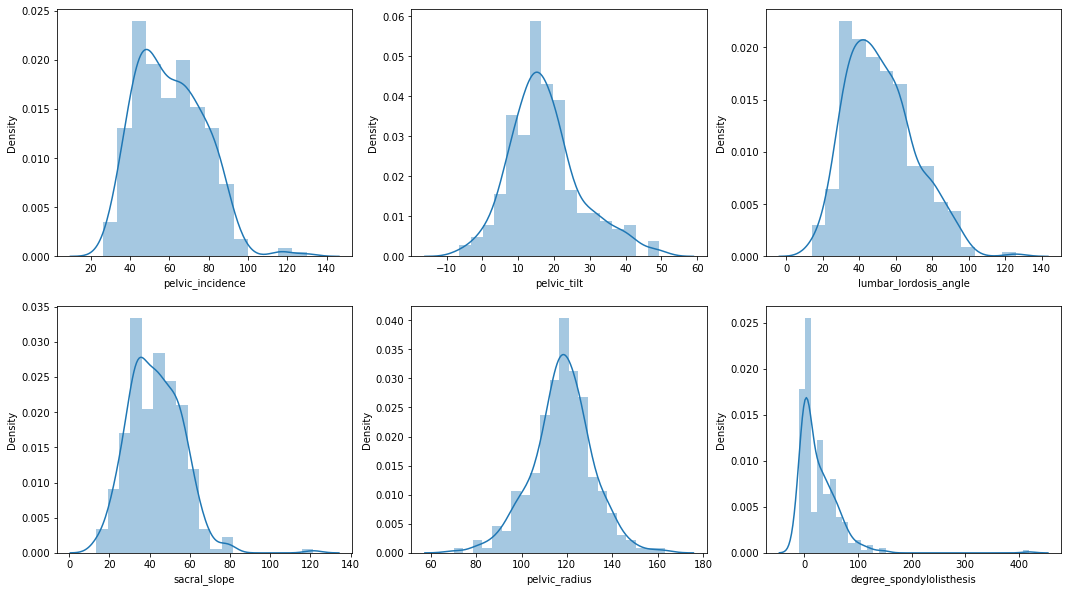

In [7]:
f, ax = plt.subplots(2, 3, figsize=(18,10))
sns.distplot(df['pelvic_incidence'],ax=ax[0,0])
sns.distplot(df['pelvic_tilt'],ax=ax[0,1])
sns.distplot(df['lumbar_lordosis_angle'],ax=ax[0,2])
sns.distplot(df['sacral_slope'],ax=ax[1,0])
sns.distplot(df['pelvic_radius'],ax=ax[1,1])
sns.distplot(df['degree_spondylolisthesis'],ax=ax[1,2])

### remove outliers using using the IQR interquantile range

<AxesSubplot:xlabel='class_3c', ylabel='degree_spondylolisthesis'>

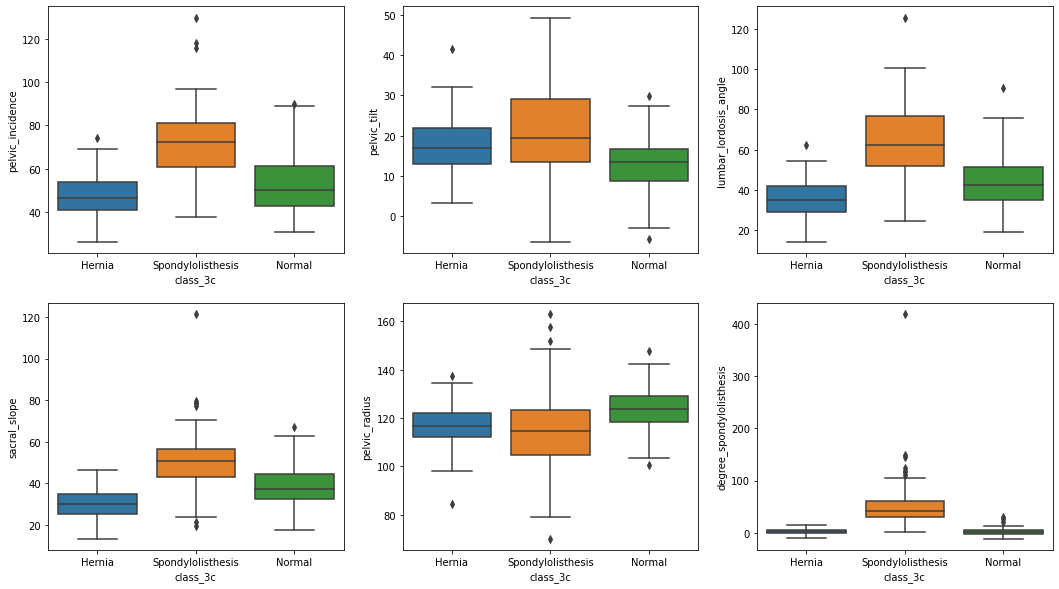

In [8]:
f, ax = plt.subplots(2, 3, figsize=(18,10))
sns.boxplot(y=df['pelvic_incidence'],x=df['class_3c'],ax=ax[0,0])
sns.boxplot(y=df['pelvic_tilt'],x=df['class_3c'],ax=ax[0,1])
sns.boxplot(y=df['lumbar_lordosis_angle'],x=df['class_3c'],ax=ax[0,2])
sns.boxplot(y=df['sacral_slope'],x=df['class_3c'],ax=ax[1,0])
sns.boxplot(y=df['pelvic_radius'],x=df['class_3c'],ax=ax[1,1])
sns.boxplot(y=df['degree_spondylolisthesis'],x=df['class_3c'],ax=ax[1,2])


In [9]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class_3c',
       'class_2c'],
      dtype='object')

In [10]:
column=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']


In [11]:
column=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']
for i in column:  
  H_IQR=df[df['class_3c']=='Hernia'][i].quantile(0.75)-df[df['class_3c']=='Hernia'][i].quantile(0.25)
  S_IQR=df[df['class_3c']=='Spondylolisthesis'][i].quantile(0.75)-df[df['class_3c']=='Spondylolisthesis'][i].quantile(0.25)
  N_IQR=df[df['class_3c']=='Normal'][i].quantile(0.75)-df[df['class_3c']=='Normal'][i].quantile(0.25)

  H_lower_bridge=df[df['class_3c']=='Hernia'][i].quantile(0.25)-(H_IQR*1.5)
  H_upper_bridge=df[df['class_3c']=='Hernia'][i].quantile(0.75)+(H_IQR*1.5)

  S_lower_bridge=df[df['class_3c']=='Spondylolisthesis'][i].quantile(0.25)-(S_IQR*1.5)
  S_upper_bridge=df[df['class_3c']=='Spondylolisthesis'][i].quantile(0.75)+(S_IQR*1.5)

  N_lower_bridge=df[df['class_3c']=='Normal'][i].quantile(0.25)-(N_IQR*1.5)
  N_upper_bridge=df[df['class_3c']=='Normal'][i].quantile(0.75)+(N_IQR*1.5)

  df.loc[(df['class_3c']=='Hernia') & (df[i]<H_lower_bridge),i]=H_lower_bridge
  df.loc[(df['class_3c']=='Hernia') & (df[i]>H_upper_bridge),i]=H_upper_bridge
  df.loc[(df['class_3c']=='Spondylolisthesis') & (df[i]<S_lower_bridge),i]=S_lower_bridge
  df.loc[(df['class_3c']=='Spondylolisthesis') & (df[i]>S_upper_bridge),i]=S_upper_bridge
  df.loc[(df['class_3c']=='Normal') & (df[i]<N_lower_bridge),i]=N_lower_bridge
  df.loc[(df['class_3c']=='Normal') & (df[i]>N_upper_bridge),i]=N_upper_bridge

<AxesSubplot:xlabel='class_3c', ylabel='degree_spondylolisthesis'>

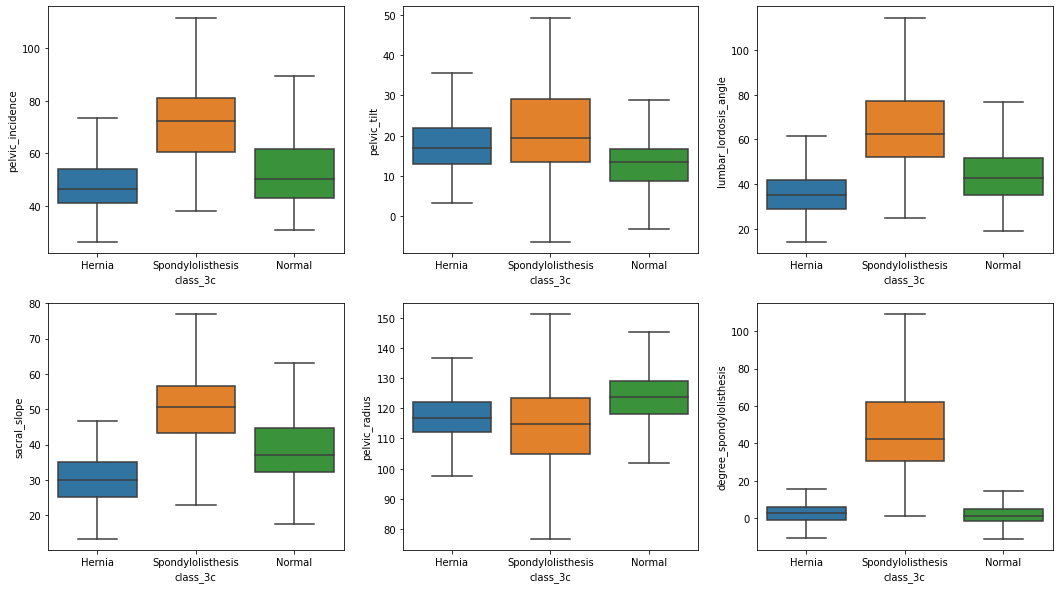

In [12]:
f, ax = plt.subplots(2, 3, figsize=(18,10))
sns.boxplot(y=df['pelvic_incidence'],x=df['class_3c'],ax=ax[0,0])
sns.boxplot(y=df['pelvic_tilt'],x=df['class_3c'],ax=ax[0,1])
sns.boxplot(y=df['lumbar_lordosis_angle'],x=df['class_3c'],ax=ax[0,2])
sns.boxplot(y=df['sacral_slope'],x=df['class_3c'],ax=ax[1,0])
sns.boxplot(y=df['pelvic_radius'],x=df['class_3c'],ax=ax[1,1])
sns.boxplot(y=df['degree_spondylolisthesis'],x=df['class_3c'],ax=ax[1,2])

# 2.Data reduction


### 2.1 Low Variance Filter

In [13]:
#If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.
#In the case of categorical variables one can say that when columns have a few unique values but more than 95% of the values in the column belong to a specific category then we can drop the column.

In [14]:
df.var()

pelvic_incidence            286.116118
pelvic_tilt                  98.899750
lumbar_lordosis_angle       336.347770
sacral_slope                161.189426
pelvic_radius               167.682278
degree_spondylolisthesis    863.892203
dtype: float64

### 2.2 High Correlation filter

In [15]:
df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.640819,0.735204,0.810612,-0.249401,0.674173
pelvic_tilt,0.640819,1.000000,0.438032,0.079477,0.036116,0.521387
lumbar_lordosis_angle,0.735204,0.438032,1.000000,0.640687,-0.079593,0.681584
sacral_slope,0.810612,0.079477,0.640687,1.000000,-0.354999,0.476101
pelvic_radius,-0.249401,0.036116,-0.079593,-0.354999,1.000000,-0.035430
degree_spondylolisthesis,0.674173,0.521387,0.681584,0.476101,-0.035430,1.000000


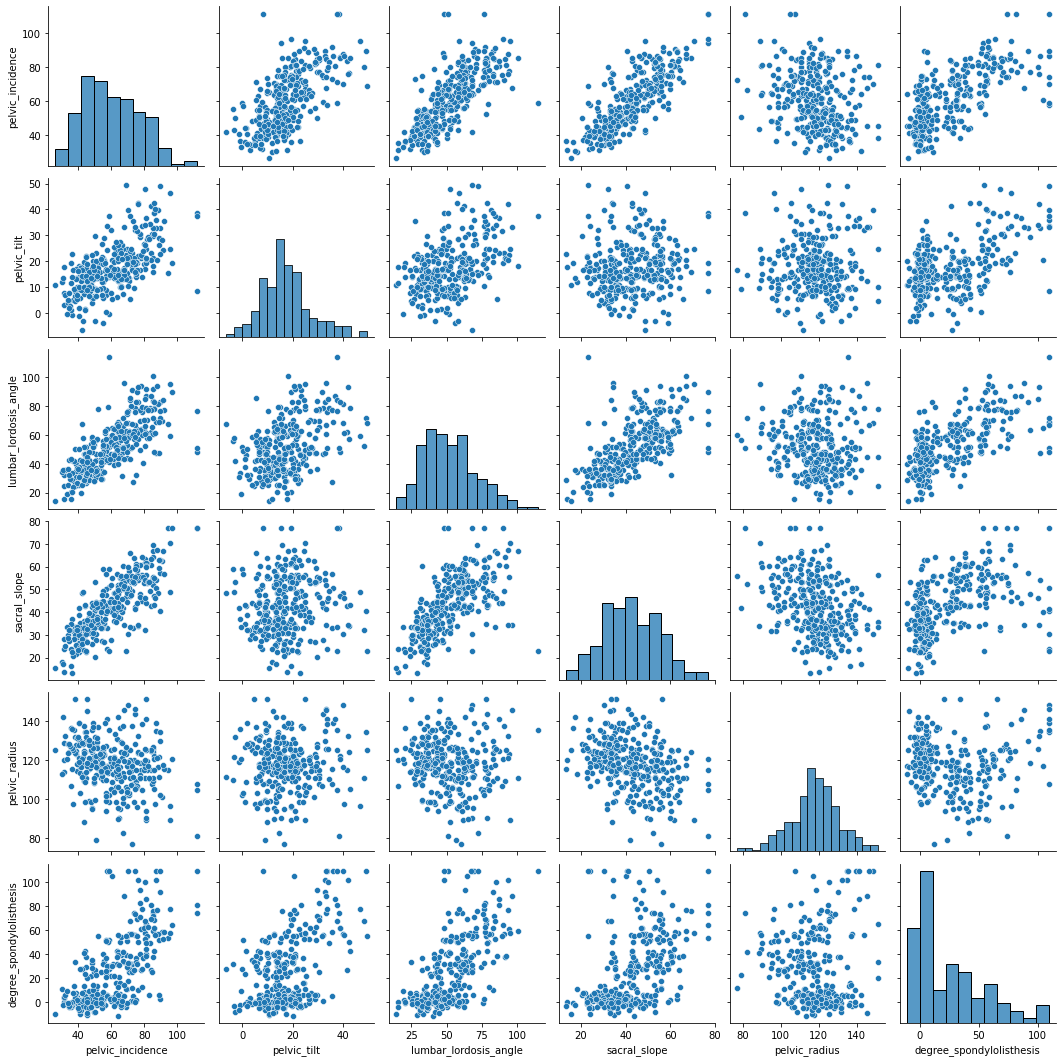

In [16]:
sns.pairplot(df)

In [17]:
# if the correlation between a pair of variables is greater than 0.9, we should seriously consider dropping one of those variables.
  

<AxesSubplot:>

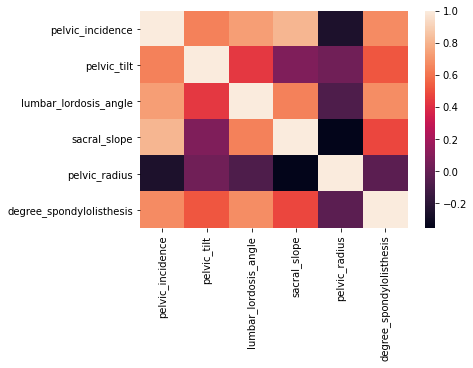

In [18]:
sns.heatmap(df.corr())

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()
df.drop(['class_2c'],axis=1)
df3=label_encoder.fit_transform(df['class_3c'])
df.drop(['class_3c'],axis=1)
df['class_3c']=df3


In [21]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_3c,class_2c
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0,Abnormal
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1,Normal


In [22]:
# sns.pairplot(df,hue='class_3c')

In [23]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df3=df['class_3c']
dfff=df.drop(['class_3c','class_2c'],axis=1)
dff=std.fit_transform(dfff)
#dff['class_3c']=df3
dff=pd.DataFrame(dff,columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])
dff['class_3c']=df3
df=dff

In [24]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_3c
0,0.155677,0.505975,-0.668346,-0.182882,-1.488589,-0.854995,0
1,-1.263754,-0.752145,-1.465374,-1.088505,-0.271686,-0.690786,0
2,0.499372,0.472324,-0.095819,0.301382,-0.922992,-0.966631,0
3,0.526906,0.717510,-0.411542,0.146011,-1.241413,-0.464262,0
4,-0.632766,-0.793330,-1.285036,-0.215578,-0.754092,-0.576481,0
...,...,...,...,...,...,...,...
305,-0.739903,-0.394025,-0.865456,-0.671094,-0.036262,-0.991000,1
306,-0.382649,0.321552,-1.235712,-0.755636,-0.274748,-0.860673,1
307,0.062045,0.520315,-0.310008,-0.318860,0.599680,-0.938605,1
308,-0.896868,-0.889909,-0.560536,-0.491791,0.048573,-0.839008,1


In [25]:
# sns.pairplot(df,hue='class_3c')

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearch

In [27]:
df1=df
x=df1.drop(['class_3c'],axis=1)
y=df1['class_3c']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0,stratify=y)

## parameters for svm

In [28]:
# Gscv=GridSearchCV(SVC(),{'C':[0.1,1,10,100],'kernel':['linear','poly','rbf']},cv=5)
# Gscv.fit(x_train,y_train)
# resf=res[['param_C','param_kernel','mean_test_score']]
# resf

In [29]:
# Gscv.best_params_

In [30]:
# svm_model=SVC(C=1,kernel='linear',gamma=0.1)
# svm_model.fit(x_train,y_train)
# ys_train_predict=svm_model(x_train)
# ys_test_predict=svm_model(x_test)
# print(accuracy_score(y_train,ys_train_predict))
# print(accuracy_score(y_test,ys_test_predict))

## LogisticRegression

In [31]:
# from sklearn.linear_model import LogisticRegression
# logist=LogisticRegression(solver='liblinear')
# c=np.linspace(1,1000,100)
# Gscv_logist=GridSearchCV(logist,{'C':c},cv=5)
# Gscv_logist.fit(x_train,y_train)
# gf_logist=pd.DataFrame(Gscv_logist.cv_results_)
# gf_logist[['param_C','mean_test_score']]

In [32]:
# Gscv_logist.best_params_

In [33]:
# logist=LogisticRegression(C=41.36,solver='liblinear')
# logist.fit(x_train,y_train)
# yl_train_predict=logist.predict(x_train)
# yl_test_predict=logist.predict(x_test)
# print(accuracy_score(y_train,yl_train_predict))
# print(accuracy_score(y_test,yl_test_predict))

## DecisionTreeClassifier

In [34]:
# from sklearn.tree import DecisionTreeClassifier
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)


In [35]:
# dt1=DecisionTreeClassifier()
# min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
# min_samples_split = np.linspace(0.01, 1.0, 20, endpoint=True)
# dt_gscv=GridSearchCV(dt1,{'criterion':["gini","entropy"],'max_depth':[1,2,3,4,5,6],'min_samples_leaf':min_samples_leafs,'min_samples_split':min_samples_split },cv=5)
# dt_gscv.fit(x_train,y_train)
# dt_gscv.best_params_

In [36]:
# dt= DecisionTreeClassifier(max_depth=5,min_samples_leaf=0.064)
# dt.fit(x_train,y_train)
# yd_predict_train=dt.predict(x_train)
# yd_predict_test=dt.predict(x_test)
# print(accuracy_score(y_train,yd_predict_train))
# print(accuracy_score(y_test,yd_predict_test))


## RandomForestClassifier

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)
# rfc=RandomForestClassifier()

In [38]:
# rfc.fit(x_train,y_train)
# y_train_predict_rfc=rfc.predict(x_train)
# y_test_predict_rfc=rfc.predict(x_test)
# print(accuracy_score(y_train,y_train_predict_rfc))
# print(accuracy_score(y_test,y_test_predict_rfc))

In [39]:
# max_depth=[3,4,5]
# criterion=['gini','entropy']
# n_estimators=np.arange(15,40,5)
# min_samples_split=[5,6,7,8,9]
# #min_samples_leaf=[1,2,3,4]
# rfc_gscv=GridSearchCV(rfc,{'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,'min_samples_split':min_samples_split},cv=)
# rfc_gscv.fit(x_train,y_train)
# rfc_gscv.best_params_

In [40]:
# rfc=RandomForestClassifier(n_estimators=35,criterion='entropy',max_depth=5,min_samples_split=7)
# rfc.fit(x_train,y_train)
# y_train_predict_rfc=rfc.predict(x_train)
# y_test_predict_rfc=rfc.predict(x_test)
# print(accuracy_score(y_train,y_train_predict_rfc))
# print(accuracy_score(y_test,y_test_predict_rfc))

# ANN

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [43]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 4, init = 'he_uniform',activation='relu',input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


TypeError: __init__() missing 1 required positional argument: 'units'